In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [37]:
# CSV file path in Google Drive
# file_path = '/content/drive/MyDrive/Dataset/DigitalExposome Dataset.csv'
file_path = 'DigitalExposome Dataset.csv'
# Load dataset using Pandas
df = pd.read_csv(file_path)

# Display the top 5 rows of the dataset
df.head()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
0,0.0,0.377574,0.0,0.511358,0.003018,0.003091,0.871758,0.000000,5,0.000000,0.0,0.0
1,0.0,0.196398,0.0,0.490903,0.003018,0.003091,0.876848,0.003091,5,0.001854,0.0,0.0
2,0.0,0.454163,0.0,0.470449,0.006036,0.006181,0.881939,0.006181,5,0.003709,0.0,0.0
3,0.0,0.322451,0.0,0.449995,0.009055,0.009272,0.887030,0.009272,5,0.005563,0.0,0.0
4,0.0,0.237595,0.0,0.429540,0.012073,0.012362,0.892121,0.012362,5,0.007417,0.0,0.0


In [38]:
df.describe()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
count,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000
mean,0.178688,0.530687,0.502239,0.427541,0.564276,0.208474,0.679874,0.224901,3.326185,0.230773,0.260318,0.482902
std,0.230127,0.266531,0.274914,0.247601,0.294515,0.210981,0.308111,0.223242,1.599863,0.255253,0.221725,0.175569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.309505,0.285412,0.214008,0.305285,0.017624,0.458047,0.012362,2.000000,0.006310,0.060686,0.449963
50%,0.016760,0.491213,0.489703,0.403671,0.644756,0.158454,0.805352,0.176150,4.000000,0.176316,0.216064,0.512280
75%,0.309984,0.776388,0.736983,0.618592,0.826943,0.326889,0.909832,0.376813,5.000000,0.407268,0.421109,0.579756
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,5.000000,24.000000,1.000000,1.000000


In [39]:
print("Shape:", df.shape)
print("Columns:", df.columns)

Shape: (42436, 12)
Columns: Index(['IBI', 'HR', 'NO2', 'Noise', 'NH3', 'PM10', 'CO', 'PM25', 'Label',
       'PM1', 'EDA', 'BVP'],
      dtype='object')


# Check Data type

In [40]:
print("\nData Types:")
df.info()


Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42436 entries, 0 to 42435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     42436 non-null  float64
 1   HR      42436 non-null  float64
 2   NO2     42436 non-null  float64
 3   Noise   42436 non-null  float64
 4   NH3     42436 non-null  float64
 5   PM10    42436 non-null  float64
 6   CO      42436 non-null  float64
 7   PM25    42436 non-null  float64
 8   Label   42436 non-null  int64  
 9   PM1     42436 non-null  float64
 10  EDA     42436 non-null  float64
 11  BVP     42436 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.9 MB


In [41]:
# cek missing value
df.isnull().sum()

IBI      0
HR       0
NO2      0
Noise    0
NH3      0
PM10     0
CO       0
PM25     0
Label    0
PM1      0
EDA      0
BVP      0
dtype: int64

In [42]:
# Duplicated
df.duplicated().sum()

14342

In [43]:
# Cek data NaN
df.isna().sum()

IBI      0
HR       0
NO2      0
Noise    0
NH3      0
PM10     0
CO       0
PM25     0
Label    0
PM1      0
EDA      0
BVP      0
dtype: int64

## Prepocessing

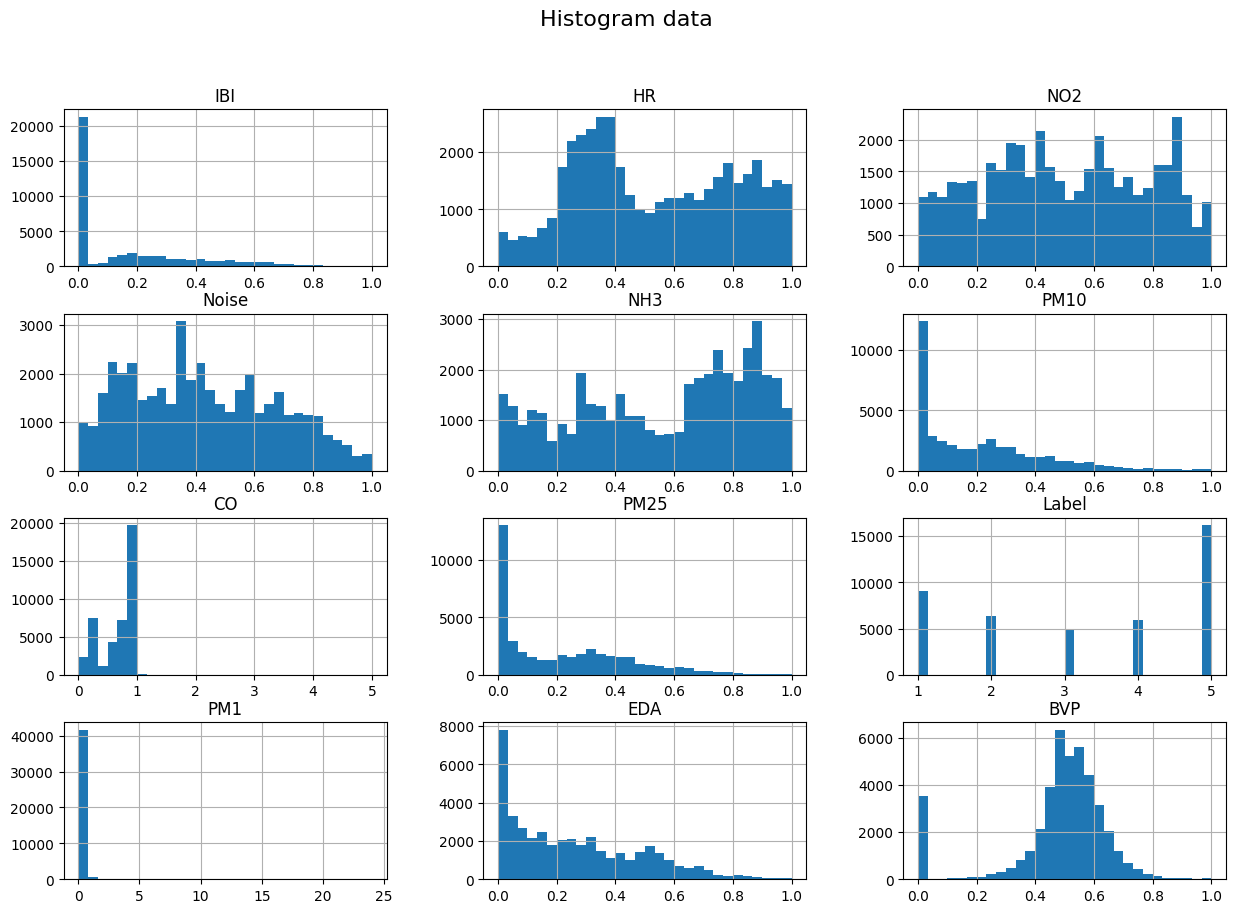

In [44]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram data", fontsize=16)
plt.show()

In [45]:
df.shape

(42436, 12)

/var/folders/c1/0skxdwdx0zdcpl8hlxr2xcz40000gn/T/ipykernel_2823/3045415140.py:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/Users/muhammadzuamaalamin/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


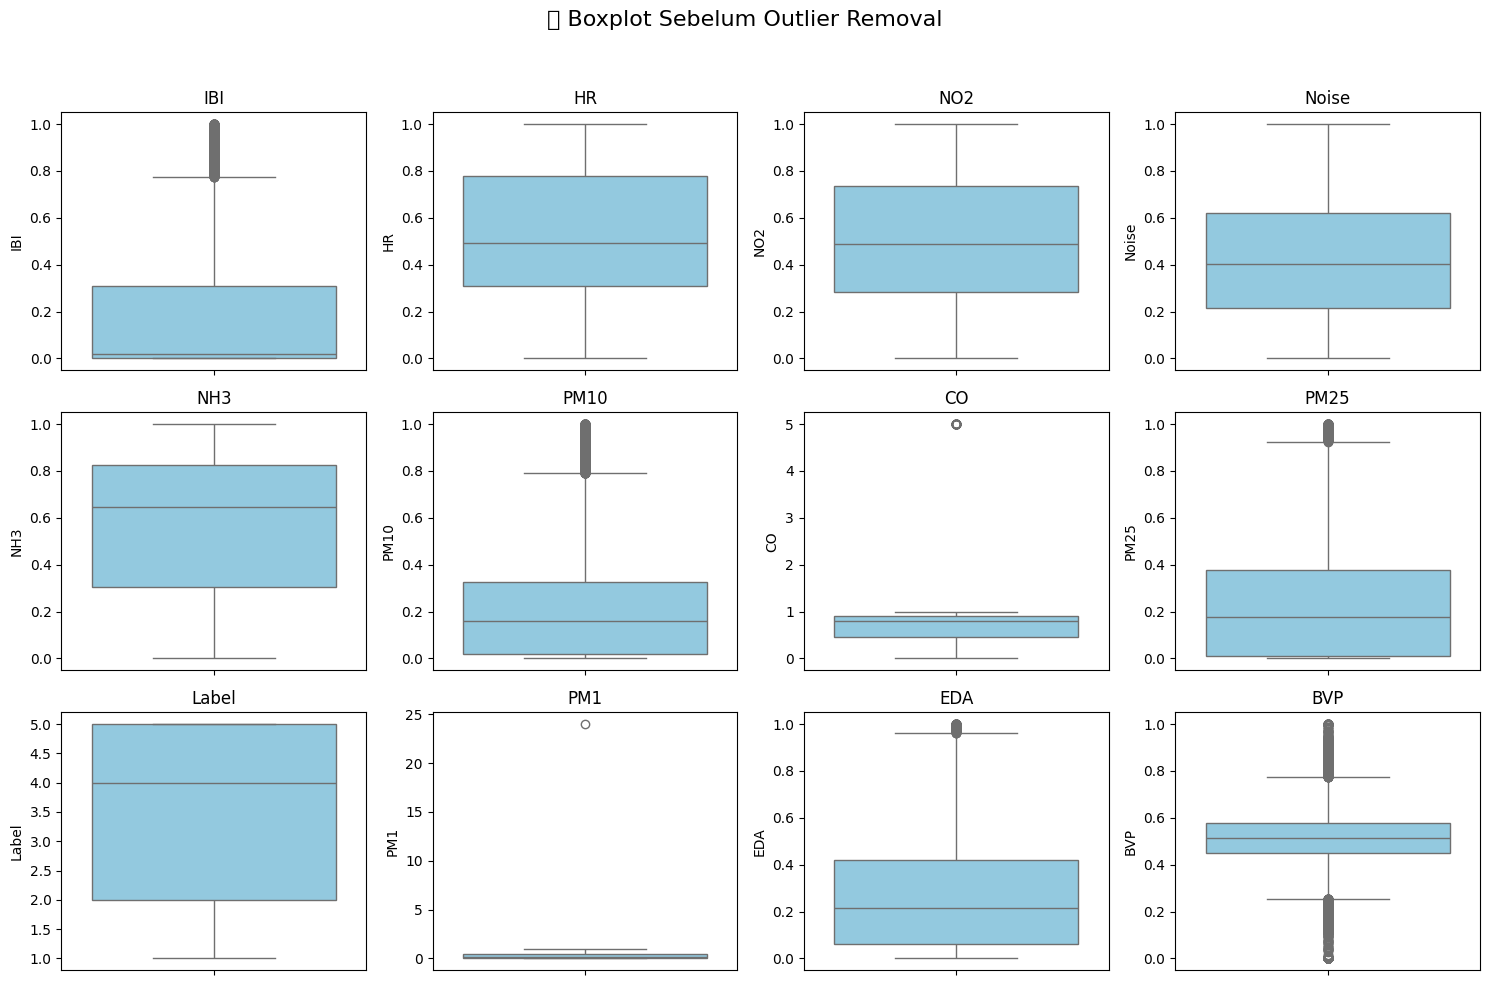

In [46]:
# Simpan salinan data sebelum outlier removal (untuk visualisasi)
df_before_outlier = df.copy()
import matplotlib.pyplot as plt
import seaborn as sns

# Buat grid layout otomatis sesuai jumlah kolom
n_cols = 4  # jumlah boxplot per baris
n_rows = -(-len(df.columns) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # supaya bisa diiterasi

for i, col in enumerate(df.columns):
    sns.boxplot(y=df_before_outlier[col], color='skyblue', ax=axes[i])
    axes[i].set_title(f"{col}")

# Hapus axis kosong kalau jumlah kolom tidak pas
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("📊 Boxplot Sebelum Outlier Removal", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [47]:
### Outlier Detection and Removal using Z-score
z_scores = np.abs(stats.zscore(df))
df = df[(z_scores < 3).all(axis=1)]  # Keep only rows where all Z-scores < 3

In [48]:
print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (41189, 12)



📊 Boxplot Setelah Outlier Removal


/var/folders/c1/0skxdwdx0zdcpl8hlxr2xcz40000gn/T/ipykernel_2823/230769811.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/Users/muhammadzuamaalamin/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


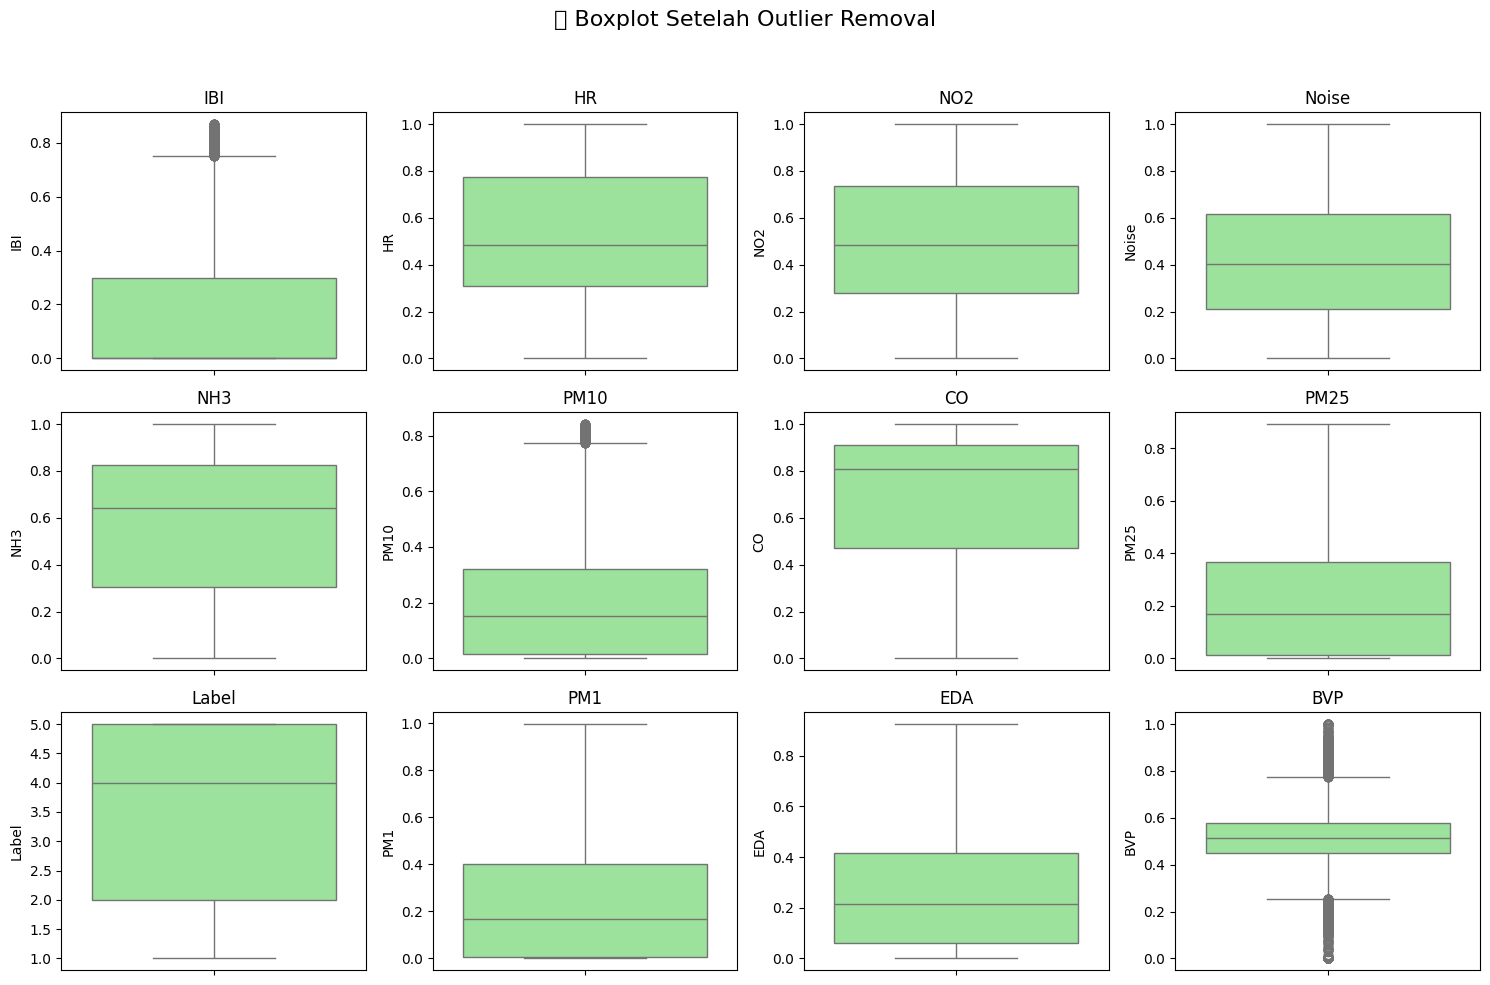

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📊 Boxplot Setelah Outlier Removal")

# Tentukan layout grid
n_cols = 4  # jumlah boxplot per baris
n_rows = -(-len(df.columns) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

# Loop setiap kolom dan pasang boxplot ke grid
for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], color='lightgreen', ax=axes[i])
    axes[i].set_title(col)

# Hapus subplot kosong kalau jumlah kolom tidak pas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Judul utama
fig.suptitle("📊 Boxplot Setelah Outlier Removal", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


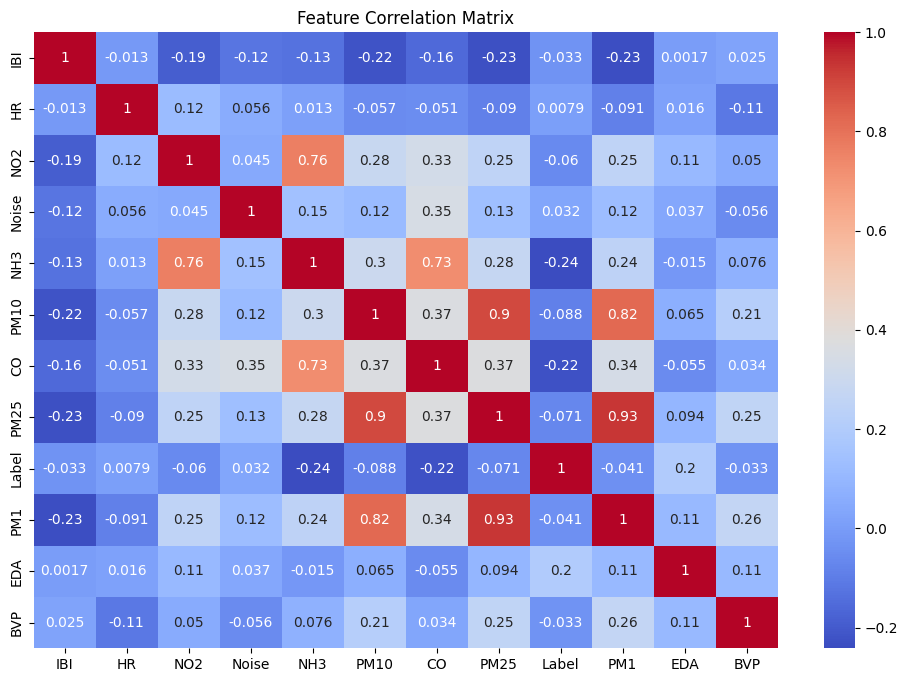

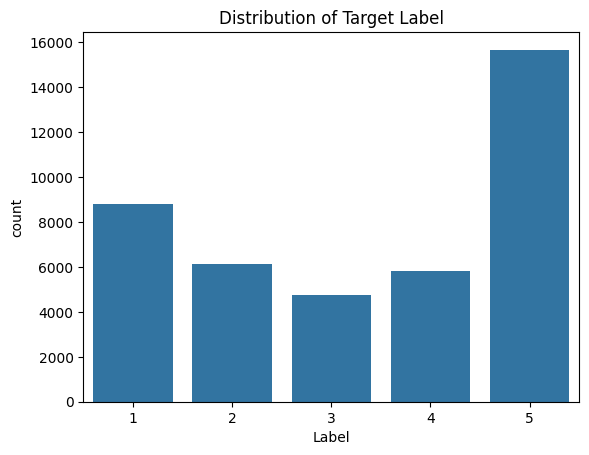

In [50]:
# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Distribusi Label
sns.countplot(x='Label', data=df)
plt.title("Distribution of Target Label")
plt.show()

In [51]:
# Memisahkan fitur (X) dan label (y)
X = df.drop('Label', axis=1)
y = df['Label']

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (41189, 11)
Shape of target (y): (41189,)


In [52]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Terapkan SMOTE di X dan y
X_smote, y_smote = smote.fit_resample(X, y)

print("Sebelum SMOTE:", Counter(y))
print("Sesudah SMOTE:", Counter(y_smote))

print("\nX_smote shape:", X_smote.shape)
print("y_smote shape:", y_smote.shape)


Sebelum SMOTE: Counter({5: 15671, 1: 8805, 2: 6137, 4: 5835, 3: 4741})
Sesudah SMOTE: Counter({5: 15671, 4: 15671, 3: 15671, 2: 15671, 1: 15671})

X_smote shape: (78355, 11)
y_smote shape: (78355,)


In [53]:
y_smote.value_counts()

Label
5    15671
4    15671
3    15671
2    15671
1    15671
Name: count, dtype: int64

In [54]:
print(X_smote.info())
print(y_smote.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78355 entries, 0 to 78354
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     78355 non-null  float64
 1   HR      78355 non-null  float64
 2   NO2     78355 non-null  float64
 3   Noise   78355 non-null  float64
 4   NH3     78355 non-null  float64
 5   PM10    78355 non-null  float64
 6   CO      78355 non-null  float64
 7   PM25    78355 non-null  float64
 8   PM1     78355 non-null  float64
 9   EDA     78355 non-null  float64
 10  BVP     78355 non-null  float64
dtypes: float64(11)
memory usage: 6.6 MB
None
Label
5    15671
4    15671
3    15671
2    15671
1    15671
Name: count, dtype: int64


## Prepocessing

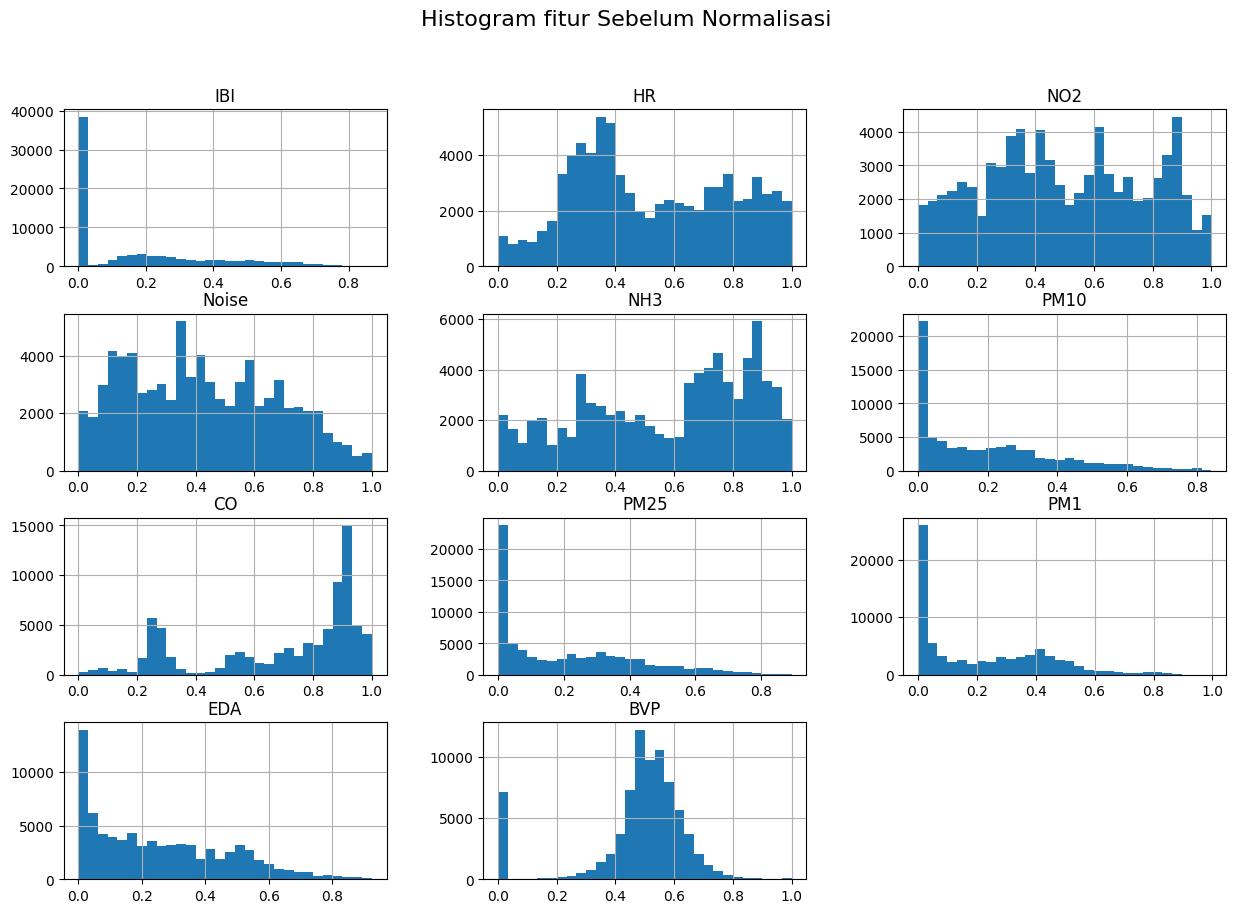

In [55]:
# Histogram sebelum normalisasi
X_smote.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram fitur Sebelum Normalisasi", fontsize=16)
plt.show()

In [56]:
from sklearn.model_selection import train_test_split
# Split data menjadi 80% data train dan 20% data test
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [57]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Data Train after normalisation = {X_train_scaled.shape}")
print(f"Data Test after normalisation = {X_test_scaled.shape}")

Data Train after normalisation = (62684, 11)
Data Test after normalisation = (15671, 11)


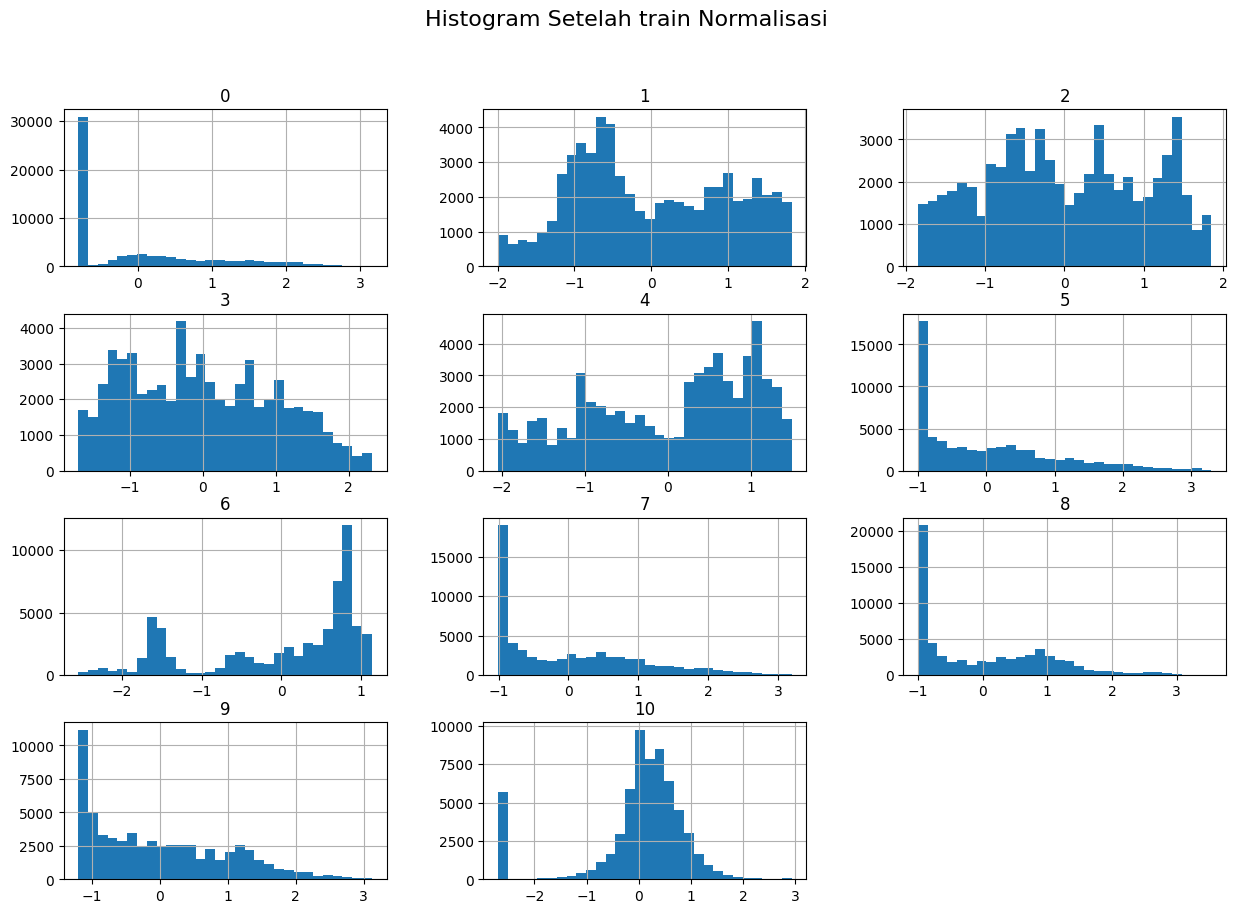

In [58]:
# Histogram setelah normalisasi
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram Setelah train Normalisasi", fontsize=16)
plt.show()

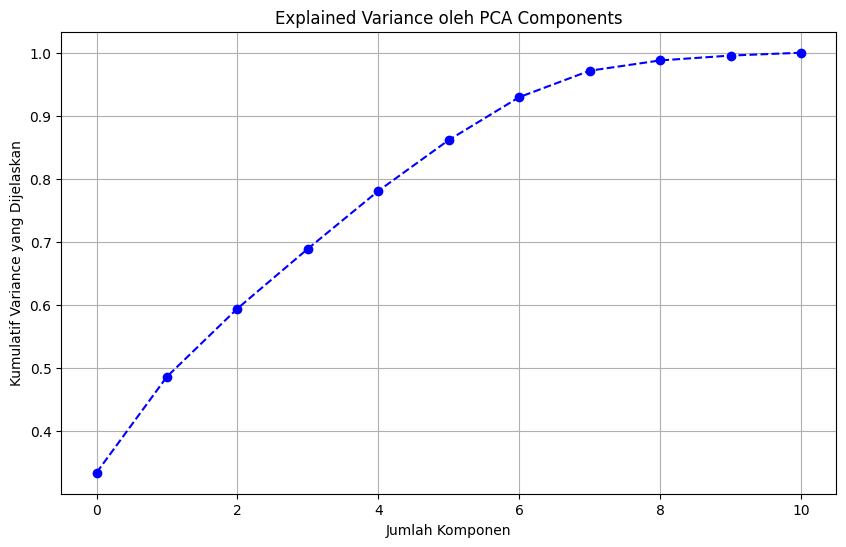

In [59]:
# Inisialisasi PCA tanpa mengurangi dimensi dulu (hanya untuk melihat explained variance)
pca = PCA(n_components=None) # Set n_components to None to keep all components initially
pca.fit(X_train_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Kumulatif Variance yang Dijelaskan')
plt.title('Explained Variance oleh PCA Components')
plt.grid(True)
plt.show()

In [60]:
# Tampilkan variansi kumulatif
explained_variance = np.cumsum(pca.explained_variance_ratio_)
for i, var in enumerate(explained_variance):
    print(f"Komponen ke-{i+1}: {var:.4f} variance terjelaskan")

# Misal ingin menyimpan komponen yang menjelaskan >=90% variance
n_components = np.argmax(explained_variance >= 0.90) + 1
print(f"\n🔍 Jumlah komponen optimal (≥90% variance): {n_components}")

Komponen ke-1: 0.3336 variance terjelaskan
Komponen ke-2: 0.4860 variance terjelaskan
Komponen ke-3: 0.5941 variance terjelaskan
Komponen ke-4: 0.6890 variance terjelaskan
Komponen ke-5: 0.7807 variance terjelaskan
Komponen ke-6: 0.8615 variance terjelaskan
Komponen ke-7: 0.9295 variance terjelaskan
Komponen ke-8: 0.9714 variance terjelaskan
Komponen ke-9: 0.9878 variance terjelaskan
Komponen ke-10: 0.9955 variance terjelaskan
Komponen ke-11: 1.0000 variance terjelaskan

🔍 Jumlah komponen optimal (≥90% variance): 7


In [61]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=7)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (62684, 7)
Shape test PCA: (15671, 7)


## Training Data

In [62]:
# import pandas as pd

# # Base (data sebelum normalisasi dan PCA)
# print("\n=== X_train (original) ===")
# print(pd.DataFrame(X_train).head())
# print("Shape:", X_train.shape)

# print("\n=== X_test (original) ===")
# print(pd.DataFrame(X_test).head())
# print("Shape:", X_test.shape)

# print("\n=== y_train ===")
# print(y_train.head())
# print("Shape:", y_train.shape)

# print("\n=== y_test ===")
# print(y_test.head())
# print("Shape:", y_test.shape)

# # Normalisasi
# print("\n=== X_train_scaled (StandardScaler) ===")
# print(pd.DataFrame(X_train_scaled).head())
# print("Shape:", X_train_scaled.shape)

# print("\n=== X_test_scaled (StandardScaler) ===")
# print(pd.DataFrame(X_test_scaled).head())
# print("Shape:", X_test_scaled.shape)

# # PCA
# print("\n=== X_train_pca (7 komponen) ===")
# print(pd.DataFrame(X_train_pca).head())
# print("Shape:", X_train_pca.shape)

# print("\n=== X_test_pca (7 komponen) ===")
# print(pd.DataFrame(X_test_pca).head())
# print("Shape:", X_test_pca.shape)


Training Menggunakan data split non normalisation

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# ======================
# 🔧 Fungsi untuk ANN
# ======================
def train_ann_model(X_train, X_test, y_train, y_test, num_classes=5, 
                    epochs=50, batch_size=32, plot=True):
    results = {}

    # --- 1. Encode Label ---
    le = LabelEncoder()
    y_train_enc = le.fit_transform(y_train)
    y_test_enc  = le.transform(y_test)

    # --- 2. One-Hot Encoding ---
    y_train_cat = to_categorical(y_train_enc, num_classes=num_classes)
    y_test_cat  = to_categorical(y_test_enc,  num_classes=num_classes)

    # --- 3. Build Model ---
    model = Sequential()
    model.add(Dense(64, activation="relu", input_dim=X_train.shape[1]))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation="softmax"))
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

    # --- 4. Train ---
    history = model.fit(
        X_train, y_train_cat,
        validation_split=0.2,
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    # --- 5. Predict & Evaluate ---
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Report (dict)
    report = classification_report(y_test_enc, y_pred, output_dict=True, zero_division=0)
    results["ANN"] = {
        "Accuracy": report["accuracy"],
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-Score": report["macro avg"]["f1-score"]
    }

    # ✅ Print ringkasan numerik
    print("\n=== 📊 METRIK PERFORMA ANN ===")
    for k, v in results["ANN"].items():
        print(f"{k:9}: {v:.4f}")

    # ✅ Classification Report full
    print("\nClassification Report:")
    print(classification_report(y_test_enc, y_pred, zero_division=0))

    # --- 6. Visualisasi (optional) ---
    if plot:
        # Confusion Matrix
        cm = confusion_matrix(y_test_enc, y_pred)
        plt.figure(figsize=(6,4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title("Confusion Matrix - ANN")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

        # Training Loss
        plt.figure(figsize=(10,4))
        plt.plot(history.history['loss'], label="Train Loss")
        plt.plot(history.history['val_loss'], label="Val Loss")
        plt.title("Training & Validation Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

        # Training Accuracy
        plt.figure(figsize=(10,4))
        plt.plot(history.history['accuracy'], label="Train Acc")
        plt.plot(history.history['val_accuracy'], label="Val Acc")
        plt.title("Training & Validation Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()

        # Grafik Performa (bar chart)
        df_results = pd.DataFrame(results).T
        df_results.plot(kind="bar", figsize=(8,5))
        plt.title("Performa ANN (Accuracy, Precision, Recall, F1-Score)")
        plt.ylabel("Score")
        plt.xticks(rotation=0)
        plt.ylim(0, 1)
        plt.show()

    return model, results, history


baseline

Epoch 1/50
1568/1568 [==============================] - 2s 767us/step - loss: 1.3934 - accuracy: 0.4210 - val_loss: 1.2395 - val_accuracy: 0.5113
Epoch 2/50
1568/1568 [==============================] - 1s 732us/step - loss: 1.2449 - accuracy: 0.5025 - val_loss: 1.1312 - val_accuracy: 0.5563
Epoch 3/50
1568/1568 [==============================] - 1s 692us/step - loss: 1.1754 - accuracy: 0.5364 - val_loss: 1.0679 - val_accuracy: 0.5894
Epoch 4/50
1568/1568 [==============================] - 1s 690us/step - loss: 1.1330 - accuracy: 0.5519 - val_loss: 1.0222 - val_accuracy: 0.6148
Epoch 5/50
1568/1568 [==============================] - 1s 729us/step - loss: 1.0930 - accuracy: 0.5706 - val_loss: 0.9787 - val_accuracy: 0.6248
Epoch 6/50
1568/1568 [==============================] - 1s 689us/step - loss: 1.0712 - accuracy: 0.5788 - val_loss: 0.9532 - val_accuracy: 0.6332
Epoch 7/50
1568/1568 [==============================] - 1s 721us/step - loss: 1.0483 - accuracy: 0.5881 - val_loss: 0.9324 -

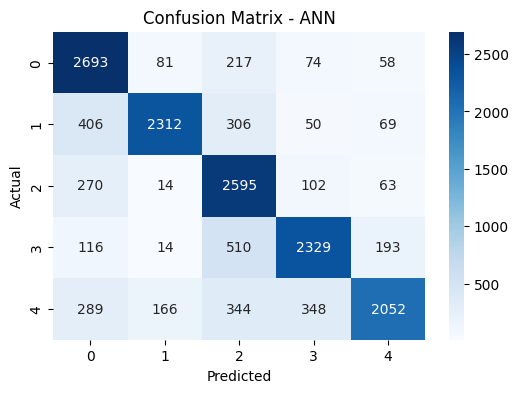

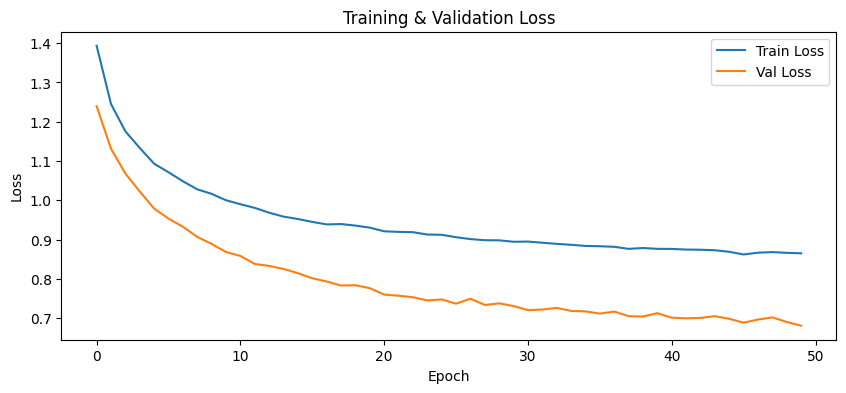

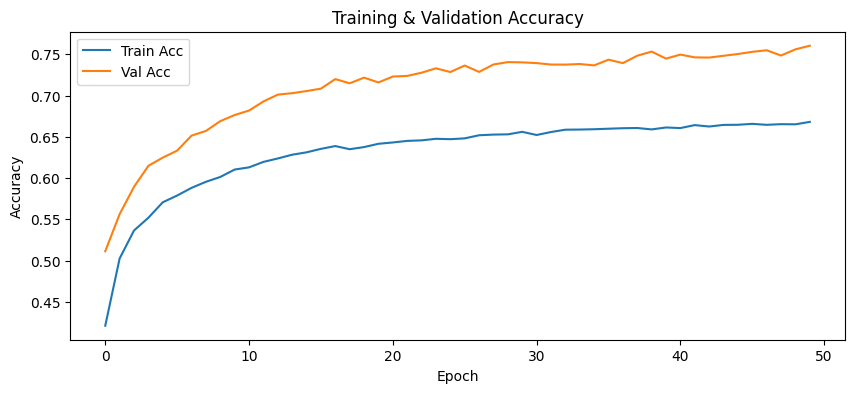

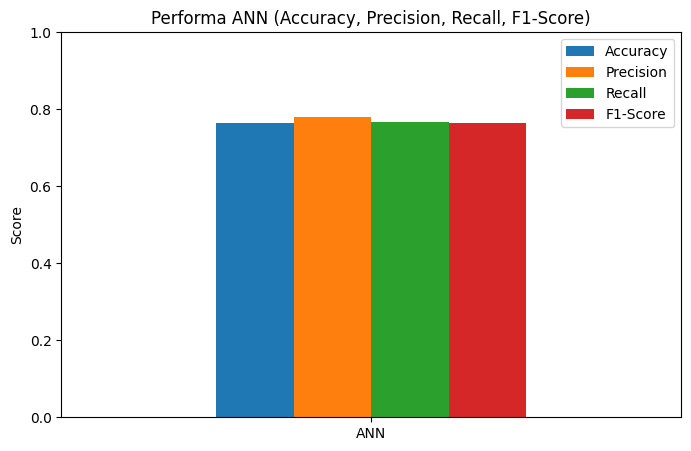

In [64]:
model, results, history = train_ann_model(
    X_train, X_test, y_train, y_test,
    num_classes=5,
    epochs=50,
    batch_size=32,
    plot=True
)


normalisasi

Epoch 1/50
1568/1568 [==============================] - 1s 754us/step - loss: 1.3322 - accuracy: 0.4535 - val_loss: 1.1352 - val_accuracy: 0.5523
Epoch 2/50
1568/1568 [==============================] - 1s 704us/step - loss: 1.1743 - accuracy: 0.5327 - val_loss: 1.0195 - val_accuracy: 0.6119
Epoch 3/50
1568/1568 [==============================] - 1s 676us/step - loss: 1.1110 - accuracy: 0.5616 - val_loss: 0.9648 - val_accuracy: 0.6502
Epoch 4/50
1568/1568 [==============================] - 1s 719us/step - loss: 1.0659 - accuracy: 0.5792 - val_loss: 0.9200 - val_accuracy: 0.6600
Epoch 5/50
1568/1568 [==============================] - 1s 828us/step - loss: 1.0376 - accuracy: 0.5921 - val_loss: 0.8920 - val_accuracy: 0.6759
Epoch 6/50
1568/1568 [==============================] - 1s 683us/step - loss: 1.0168 - accuracy: 0.6010 - val_loss: 0.8691 - val_accuracy: 0.6837
Epoch 7/50
1568/1568 [==============================] - 1s 708us/step - loss: 0.9981 - accuracy: 0.6096 - val_loss: 0.8453 -

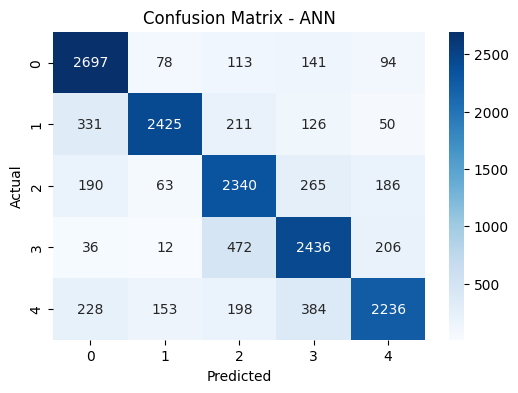

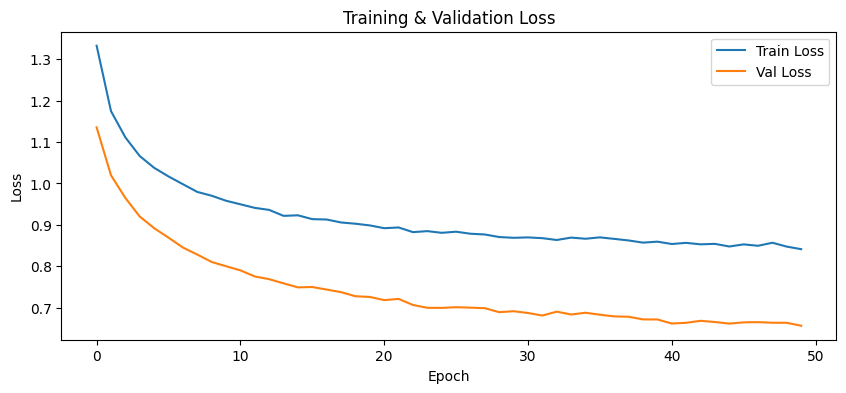

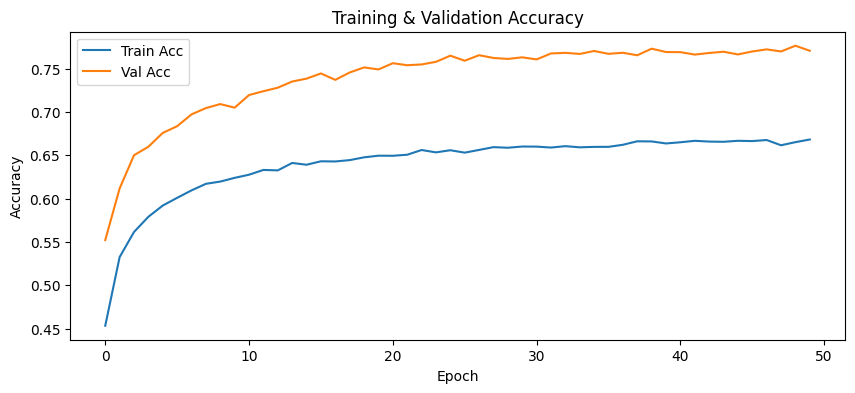

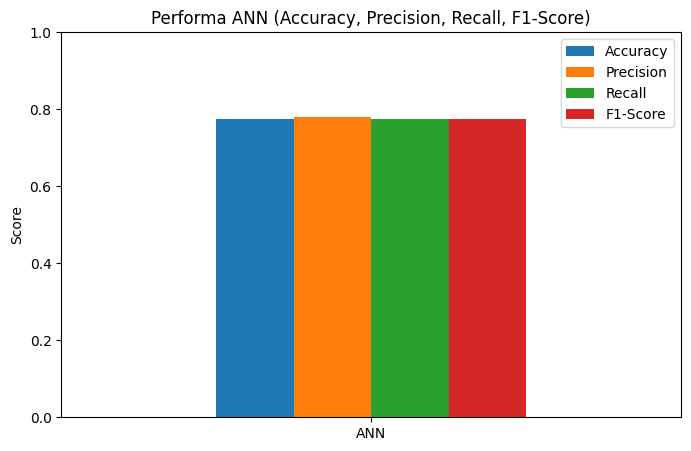

In [65]:
model, results, history = train_ann_model(
    X_train_scaled, X_test_scaled, y_train, y_test,
    num_classes=5,
    epochs=50,
    batch_size=32,
    plot=True
)


pca


In [66]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=7)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (62684, 7)
Shape test PCA: (15671, 7)


Epoch 1/50
1568/1568 [==============================] - 1s 758us/step - loss: 1.3543 - accuracy: 0.4376 - val_loss: 1.1795 - val_accuracy: 0.5362
Epoch 2/50
1568/1568 [==============================] - 1s 691us/step - loss: 1.2218 - accuracy: 0.5084 - val_loss: 1.0940 - val_accuracy: 0.5735
Epoch 3/50
1568/1568 [==============================] - 1s 693us/step - loss: 1.1656 - accuracy: 0.5347 - val_loss: 1.0406 - val_accuracy: 0.5963
Epoch 4/50
1568/1568 [==============================] - 1s 661us/step - loss: 1.1291 - accuracy: 0.5525 - val_loss: 0.9999 - val_accuracy: 0.6144
Epoch 5/50
1568/1568 [==============================] - 1s 682us/step - loss: 1.1068 - accuracy: 0.5610 - val_loss: 0.9798 - val_accuracy: 0.6202
Epoch 6/50
1568/1568 [==============================] - 1s 721us/step - loss: 1.0837 - accuracy: 0.5705 - val_loss: 0.9601 - val_accuracy: 0.6345
Epoch 7/50
1568/1568 [==============================] - 1s 677us/step - loss: 1.0719 - accuracy: 0.5764 - val_loss: 0.9418 -

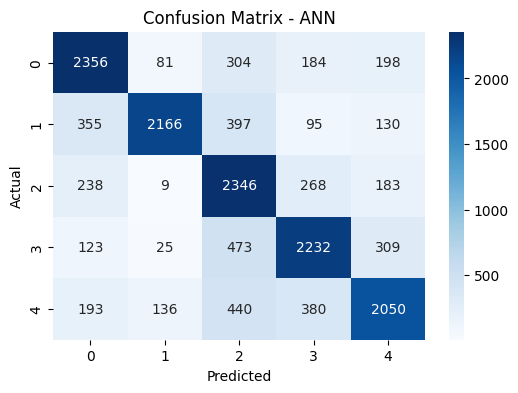

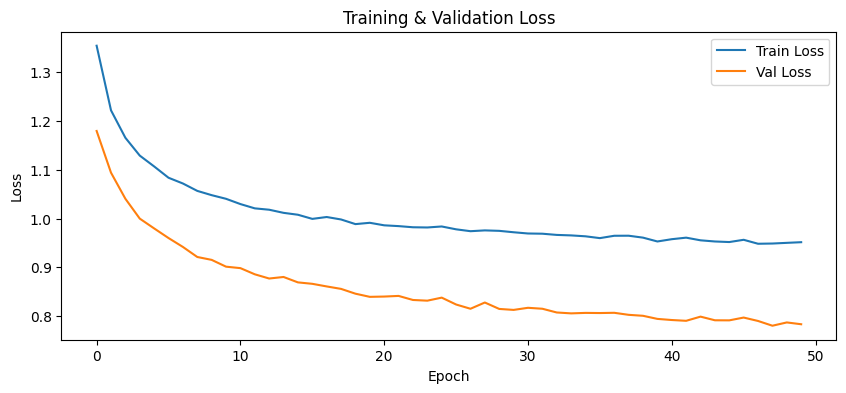

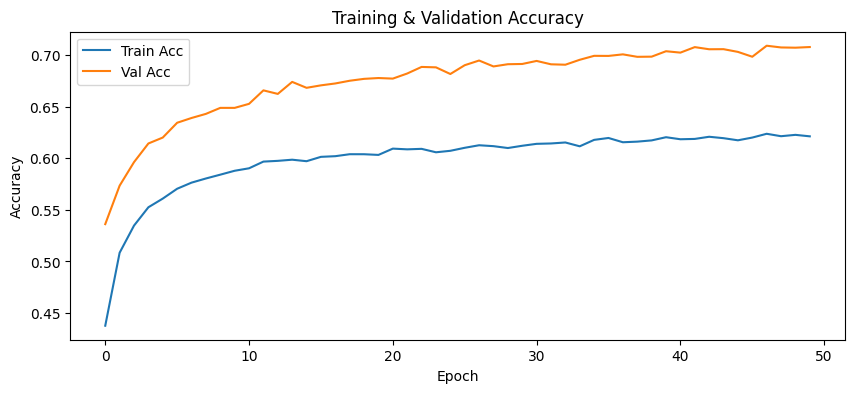

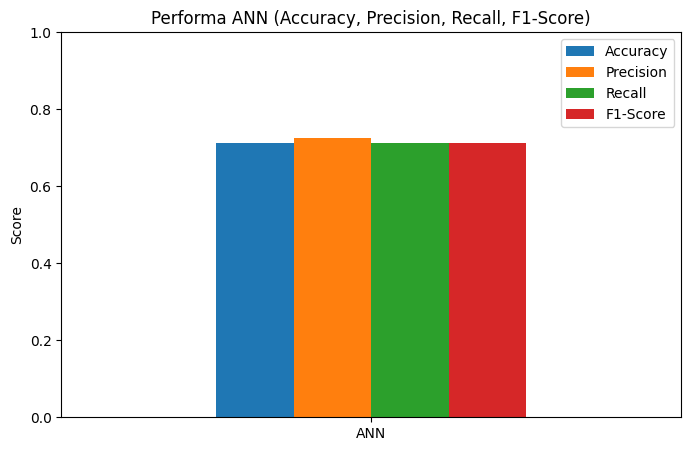

In [67]:
model, results, history = train_ann_model(
    X_train_pca, X_test_pca, y_train, y_test,
    num_classes=5,
    epochs=50,
    batch_size=32,
    plot=True
)

In [70]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=6)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)

Shape train PCA: (62684, 6)
Shape test PCA: (15671, 6)


Epoch 1/50
1568/1568 [==============================] - 1s 741us/step - loss: 1.3583 - accuracy: 0.4386 - val_loss: 1.2041 - val_accuracy: 0.5273
Epoch 2/50
1568/1568 [==============================] - 1s 732us/step - loss: 1.2455 - accuracy: 0.4994 - val_loss: 1.1340 - val_accuracy: 0.5609
Epoch 3/50
1568/1568 [==============================] - 1s 656us/step - loss: 1.1989 - accuracy: 0.5210 - val_loss: 1.0880 - val_accuracy: 0.5777
Epoch 4/50
1568/1568 [==============================] - 1s 656us/step - loss: 1.1686 - accuracy: 0.5336 - val_loss: 1.0558 - val_accuracy: 0.5882
Epoch 5/50
1568/1568 [==============================] - 1s 626us/step - loss: 1.1466 - accuracy: 0.5408 - val_loss: 1.0323 - val_accuracy: 0.6029
Epoch 6/50
1568/1568 [==============================] - 1s 630us/step - loss: 1.1302 - accuracy: 0.5465 - val_loss: 1.0106 - val_accuracy: 0.6145
Epoch 7/50
1568/1568 [==============================] - 1s 594us/step - loss: 1.1148 - accuracy: 0.5554 - val_loss: 0.9960 -

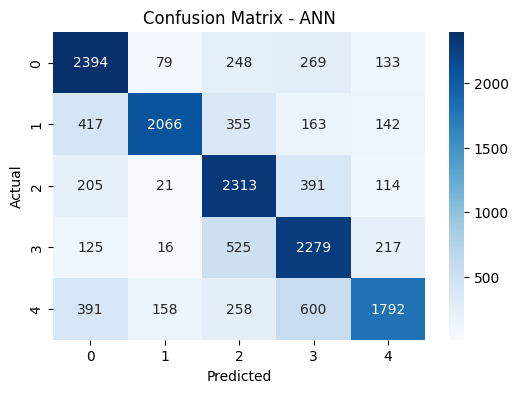

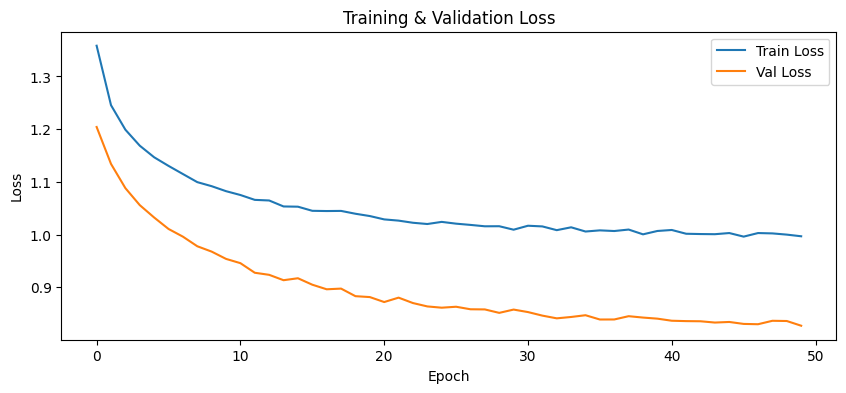

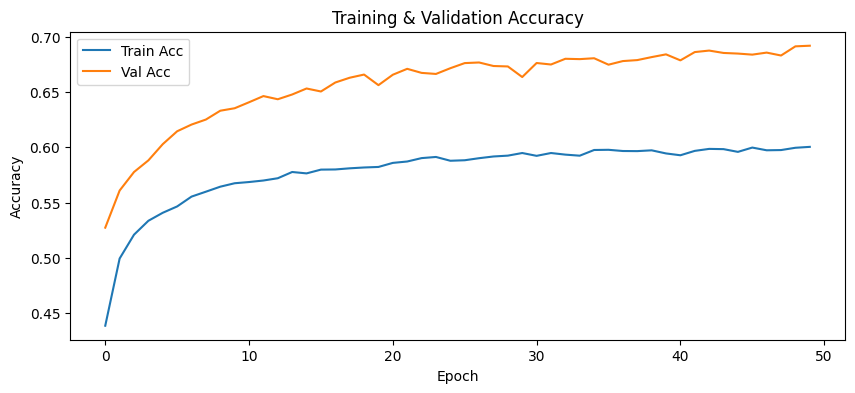

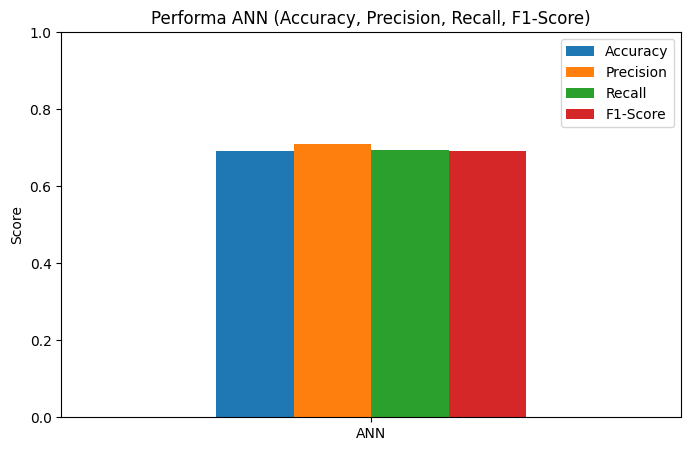

In [71]:
model, results, history = train_ann_model(
    X_train_pca, X_test_pca, y_train, y_test,
    num_classes=5,
    epochs=50,
    batch_size=32,
    plot=True
)

In [72]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=5)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)

Shape train PCA: (62684, 5)
Shape test PCA: (15671, 5)


Epoch 1/50
1568/1568 [==============================] - 1s 621us/step - loss: 1.3923 - accuracy: 0.4180 - val_loss: 1.2589 - val_accuracy: 0.4903
Epoch 2/50
1568/1568 [==============================] - 1s 603us/step - loss: 1.2849 - accuracy: 0.4743 - val_loss: 1.1761 - val_accuracy: 0.5336
Epoch 3/50
1568/1568 [==============================] - 1s 602us/step - loss: 1.2384 - accuracy: 0.4972 - val_loss: 1.1384 - val_accuracy: 0.5520
Epoch 4/50
1568/1568 [==============================] - 1s 568us/step - loss: 1.2078 - accuracy: 0.5097 - val_loss: 1.0992 - val_accuracy: 0.5638
Epoch 5/50
1568/1568 [==============================] - 1s 628us/step - loss: 1.1861 - accuracy: 0.5157 - val_loss: 1.0820 - val_accuracy: 0.5697
Epoch 6/50
1568/1568 [==============================] - 1s 649us/step - loss: 1.1692 - accuracy: 0.5241 - val_loss: 1.0610 - val_accuracy: 0.5765
Epoch 7/50
1568/1568 [==============================] - 1s 677us/step - loss: 1.1562 - accuracy: 0.5299 - val_loss: 1.0518 -

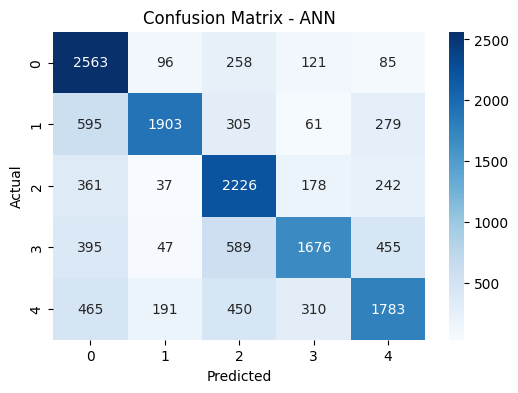

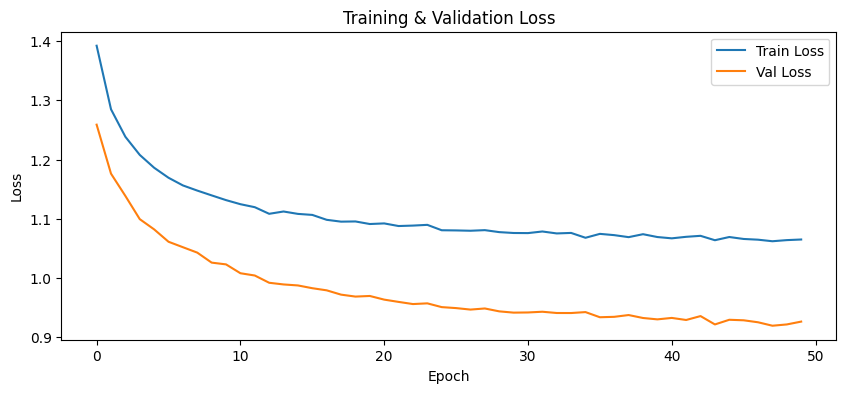

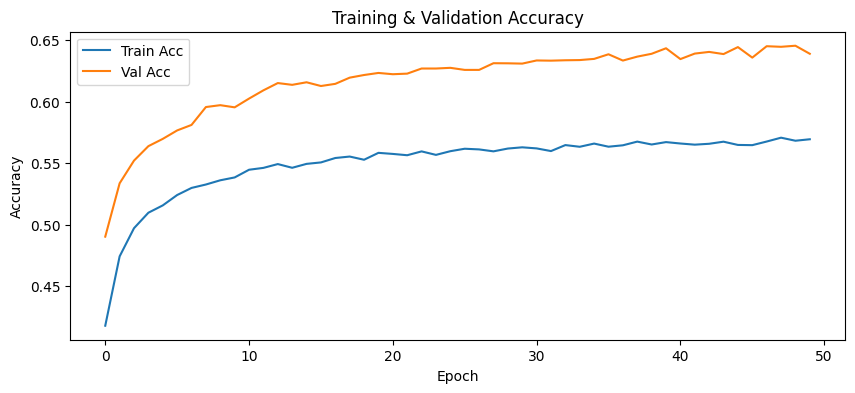

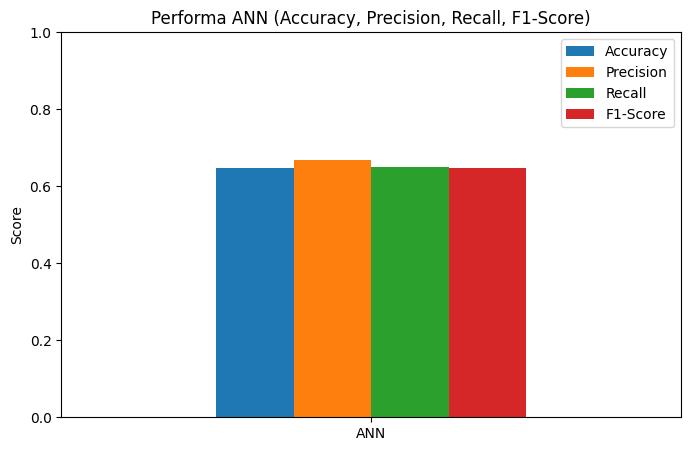

In [73]:
model, results, history = train_ann_model(
    X_train_pca, X_test_pca, y_train, y_test,
    num_classes=5,
    epochs=50,
    batch_size=32,
    plot=True
)